# Submitted By : Dennis O.

# Purpose: This script is part of an assignment to use Decision Tree in R.


## Load Data and Packages

In [1]:
 #load party package for decision tree

library("party")

# load the following packages
library("lattice")
library("ggplot2")
library("caret")
library('readr')
library("rpart")
library ("e1071")
library("arulesViz")


Warning message:
"package 'party' was built under R version 3.6.3"Loading required package: grid
Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: modeltools
Warning message:
"package 'modeltools' was built under R version 3.6.3"Loading required package: stats4
Loading required package: strucchange
Warning message:
"package 'strucchange' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich
Warning message:
"package 'sandwich' was built under R version 3.6.3"Warning message:
"package 'lattice' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Warning message:
"package 'readr' was 

In [2]:
# Set the work directory
setwd("C:")

In [3]:
# Load and read the dataset from working directory
bank_marketing <- read_csv("C:/Documents/R/bank-marketing.csv")

Parsed with column specification:
cols(
  age = col_double(),
  job = col_character(),
  `marital-status` = col_character(),
  education = col_character(),
  `default-credit` = col_character(),
  `yearly-balance` = col_double(),
  `housing-loan` = col_character(),
  `personal-loan` = col_character(),
  `last-contact-type` = col_character(),
  `last-contact-day` = col_double(),
  `last-contact-month` = col_character(),
  `last-contact-duration-seconds` = col_double(),
  `current-campaign-contacts` = col_double(),
  `passed-days` = col_character(),
  `previous-campaigns` = col_double(),
  `outcome-previous-campaign` = col_character(),
  `suscribed-term-deposited` = col_character()
)
Warning message:
"5 parsing failures.
 row            col expected actual                                file
1771 yearly-balance a double      ? 'C:/Documents/R/bank-marketing.csv'
2163 yearly-balance a double      ? 'C:/Documents/R/bank-marketing.csv'
3495 yearly-balance a double      ? 'C:/Documents/R/bank

## Exploring the data

In [4]:
# show dataframe
str(bank_marketing)
summary(bank_marketing)

tibble [4,521 x 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age                          : num [1:4521] 30 33 35 30 59 35 36 39 41 43 ...
 $ job                          : chr [1:4521] "unemployed" "services" "management" "management" ...
 $ marital-status               : chr [1:4521] "married" "married" "single" "married" ...
 $ education                    : chr [1:4521] "primary" "secondary" "tertiary" "tertiary" ...
 $ default-credit               : chr [1:4521] "no" "no" "no" "no" ...
 $ yearly-balance               : num [1:4521] 1787 4789 1350 1476 0 ...
 $ housing-loan                 : chr [1:4521] "no" "yes" "yes" "yes" ...
 $ personal-loan                : chr [1:4521] "no" "yes" "no" "yes" ...
 $ last-contact-type            : chr [1:4521] "cellular" "cellular" "cellular" "unknown" ...
 $ last-contact-day             : num [1:4521] 19 11 16 3 5 23 14 6 14 17 ...
 $ last-contact-month           : chr [1:4521] "oct" "may" "apr" "jun" ...
 $ last-contact-duration-seconds: n

      age            job            marital-status      education        
 Min.   :19.00   Length:4521        Length:4521        Length:4521       
 1st Qu.:33.00   Class :character   Class :character   Class :character  
 Median :39.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :41.17                                                           
 3rd Qu.:49.00                                                           
 Max.   :87.00                                                           
                                                                         
 default-credit     yearly-balance  housing-loan       personal-loan     
 Length:4521        Min.   :-3313   Length:4521        Length:4521       
 Class :character   1st Qu.:   76   Class :character   Class :character  
 Mode  :character   Median :  447   Mode  :character   Mode  :character  
                    Mean   : 1431                                        
                    3rd Qu.: 1480     

In [5]:
# Find any missing values in the data
apply(bank_marketing, 2, function (bank_marketing) sum(is.na(bank_marketing)))

age                           job 
                            0                             0 
               marital-status                     education 
                            0                             0 
               default-credit                yearly-balance 
                            0                             5 
                 housing-loan                 personal-loan 
                            0                             0 
            last-contact-type              last-contact-day 
                            0                             0 
           last-contact-month last-contact-duration-seconds 
                            0                             0 
    current-campaign-contacts                   passed-days 
                            0                             0 
           previous-campaigns     outcome-previous-campaign 
                            0                             0 
     suscribed-term-deposited 
                            0

In [6]:
#create a new table for suscribed-term-deposited
counts<- table(bank_marketing$`suscribed-term-deposited`)

In [7]:
# Shown the table dataframe
str(counts)

 'table' int [1:2(1d)] 4000 521
 - attr(*, "dimnames")=List of 1
  ..$ : chr [1:2] "no" "yes"


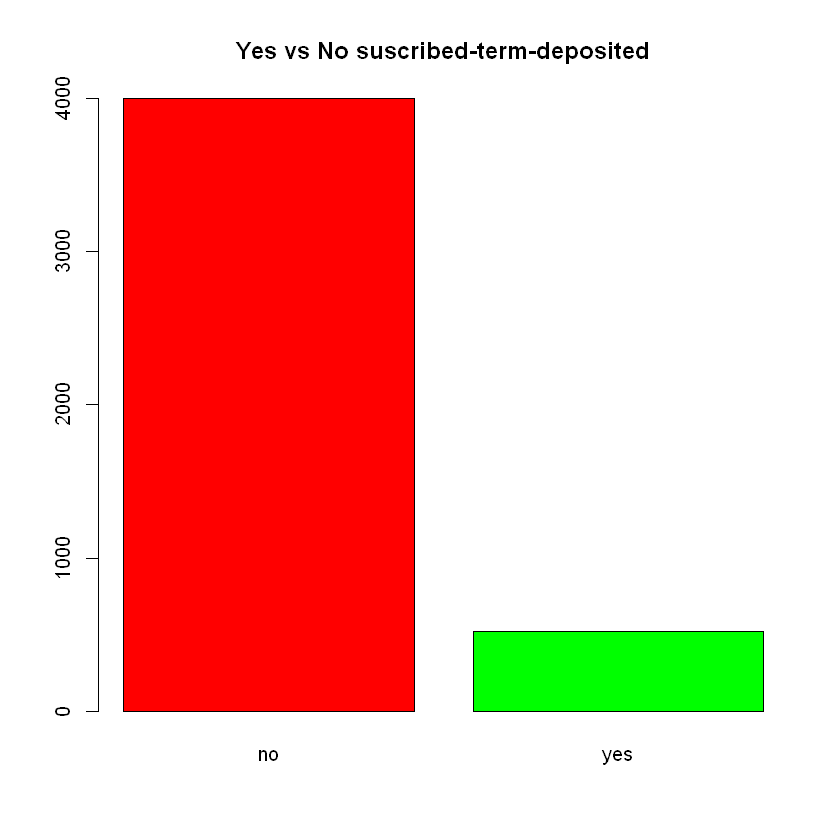

In [8]:
# Bar Plot on suscribed-term-deposited
barplot(counts, main="Yes vs No suscribed-term-deposited",
        col=c("red", "green"))

## Data Pre-Processing

In [9]:
# replace "?" with "NA"
bank_marketing$`passed-days`<- replace(bank_marketing$`passed-days`,bank_marketing$`passed-days`=="?", NA)
bank_marketing$`passed-days`

[1] NA    "339" "330" NA    NA    "176" "330" NA    NA    "147" NA    NA   
  [13] NA    NA    "241" NA    NA    "152" NA    "152" NA    NA    NA    NA   
  [25] NA    NA    NA    "105" NA    NA    NA    NA    NA    NA    NA    NA   
  [37] NA    NA    "342" NA    "101" NA    NA    NA    NA    NA    "5"   NA   
  [49] NA    "92"  NA    NA    NA    "56"  NA    NA    NA    NA    NA    NA   
  [61] NA    NA    NA    NA    NA    "170" NA    NA    NA    NA    "182" NA   
  [73] NA    NA    NA    NA    "297" NA    NA    "196" NA    NA    NA    "460"
  [85] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
  [97] NA    "137" "182" NA    NA    "367" NA    NA    NA    "145" NA    NA   
 [109] NA    NA    "169" NA    NA    "207" NA    NA    NA    NA    NA    NA   
 [121] NA    NA    NA    NA    "266" NA    NA    NA    "288" NA    NA    NA   
 [133] NA    "168" NA    NA    "345" NA    NA    NA    NA    NA    NA    NA   
 [145] NA    NA    NA    NA    "436" NA    NA    NA    NA    NA    NA    NA   
 [157] "90"  "183" NA    NA    NA    NA    NA    NA    "146" NA    NA    NA   
 [169] NA    NA    NA    NA    "335" NA    NA    NA    NA    "347" NA    "119"
 [181] NA    NA    NA    NA    NA    NA    "7"   "271" "347" NA    NA    NA   
 [193] NA    NA    NA    NA    NA    NA    NA    "181" "88"  NA    "141" "126"
 [205] NA    NA    NA    "61"  "271" NA    NA    NA    "373" NA    NA    NA   
 [217] NA    "351" NA    NA    NA    NA    NA    NA    NA    NA    NA    "242"
 [229] NA    "62"  NA    NA    "351" "91"  NA    NA    "308" NA    NA    NA   
 [241] NA    NA    NA    NA    NA    "250" NA    NA    NA    "172" NA    NA   
 [253] NA    "265" NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [265] "78"  NA    NA    NA    NA    NA    "28"  NA    NA    NA    NA    NA   
 [277] "79"  NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [289] NA    "1"   NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [301] NA    "188" NA    NA    NA    NA    NA    NA    NA    NA    "167" NA   
 [313] NA    NA    "89"  NA    NA    NA    "164" NA    NA    NA    NA    "1"  
 [325] NA    "462" NA    NA    "209" NA    NA    "321" NA    NA    NA    NA   
 [337] NA    "254" "183" NA    "176" NA    NA    NA    NA    "347" NA    "94" 
 [349] NA    "364" NA    NA    NA    "96"  "356" NA    NA    NA    NA    NA   
 [361] NA    NA    NA    NA    NA    NA    NA    "149" NA    "183" NA    NA   
 [373] NA    NA    "308" "363" NA    "275" NA    NA    "325" NA    NA    "341"
 [385] NA    NA    NA    NA    NA    NA    "260" NA    NA    NA    "358" NA   
 [397] NA    "87"  NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [409] "303" "98"  NA    NA    "183" NA    NA    NA    NA    NA    NA    NA   
 [421] NA    "351" NA    "327" NA    NA    NA    NA    NA    NA    NA    NA   
 [433] NA    "337" NA    NA    NA    "322" NA    NA    NA    NA    NA    NA   
 [445] NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [457] NA    NA    NA    "102" NA    NA    NA    NA    "99"  "99"  NA    NA   
 [469] NA    NA    NA    NA    NA    NA    NA    NA    NA    "92"  NA    NA   
 [481] NA    NA    "196" NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [493] "91"  NA    NA    NA    "370" NA    NA    NA    "84"  NA    NA    NA   
 [505] NA    NA    NA    NA    NA    NA    "212" NA    "63"  NA    NA    "325"
 [517] NA    NA    "367" "81"  NA    NA    "191" NA    NA    NA    NA    NA   
 [529] "360" NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA   
 [541] "181" NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    "332"
 [553] "80"  NA    NA    "85"  NA    NA    NA    NA    NA    NA    NA    "176"
 [565] NA    "247" NA    NA    NA    NA    NA    NA    "150" NA    NA    NA   
 [577] NA    NA    "175" "176" NA    NA    NA    NA    NA    NA    NA    NA   
 [589] NA    NA    NA    NA    NA    NA    NA    NA    "382" NA    "261" NA   
 [601] NA    NA    "147" NA    NA    NA    NA    NA  

In [10]:
#Check for and handle missing values
bank_marketing$`yearly-balance`[is.na(bank_marketing$`yearly-balance`)]<-mean(bank_marketing$`yearly-balance`, na.rm=TRUE)
bank_marketing$`passed-days`[is.na(bank_marketing$`passed-days`)]<-0

In [11]:
# convert the dependent variable suscribed term deposited to a factor
bank_marketing$`suscribed-term-deposited`<-factor(bank_marketing$`suscribed-term-deposited`)

In [12]:
# convert the age variable to a numeric
bank_marketing$age<-as.numeric(as.character(bank_marketing$age))


In [13]:
#convert all the character independent variables to factors 

bank_marketing$job<-factor(bank_marketing$job)

bank_marketing$`marital-status`<-factor(bank_marketing$`marital-status`)

bank_marketing$education<-factor(bank_marketing$education)

bank_marketing$`default-credit`<-factor(bank_marketing$`default-credit`)

bank_marketing$`housing-loan`<-factor(bank_marketing$`housing-loan`)

bank_marketing$`personal-loan`<-factor(bank_marketing$`personal-loan`)

bank_marketing$`last-contact-type`<-factor(bank_marketing$`last-contact-type`)

bank_marketing$`last-contact-month`<-factor(bank_marketing$`last-contact-month`)

bank_marketing$`passed-days`<-factor(bank_marketing$`passed-days`)

bank_marketing$`outcome-previous-campaign`<-factor(bank_marketing$`outcome-previous-campaign`)


In [14]:
# show class type for each variables
sapply(bank_marketing,class)

age                           job 
                    "numeric"                      "factor" 
               marital-status                     education 
                     "factor"                      "factor" 
               default-credit                yearly-balance 
                     "factor"                     "numeric" 
                 housing-loan                 personal-loan 
                     "factor"                      "factor" 
            last-contact-type              last-contact-day 
                     "factor"                     "numeric" 
           last-contact-month last-contact-duration-seconds 
                     "factor"                     "numeric" 
    current-campaign-contacts                   passed-days 
                    "numeric"                      "factor" 
           previous-campaigns     outcome-previous-campaign 
                    "numeric"                      "factor" 
     suscribed-term-deposited 
                     "factor"

## ctree Method

In [15]:
# split the data into a training and test set
set.seed(1234)
ind <- sample(2, nrow(bank_marketing), replace = TRUE, prob = c(0.7, 0.3))
train <- bank_marketing[ind == 1, ]
test <- bank_marketing[ind == 2, ]

In [16]:
# Run the method on a training data
myFormula<-`suscribed-term-deposited`~.
model<- ctree(myFormula, data = train)

In [17]:
#output the tree structure
print(model) 


	 Conditional inference tree with 17 terminal nodes

Response:  suscribed-term-deposited 
Inputs:  age, job, marital-status, education, default-credit, yearly-balance, housing-loan, personal-loan, last-contact-type, last-contact-day, last-contact-month, last-contact-duration-seconds, current-campaign-contacts, passed-days, previous-campaigns, outcome-previous-campaign 
Number of observations:  3181 

1) passed-days == {1, 102, 130, 140, 141, 144, 148, 164, 166, 174, 179, 180, 181, 182, 183, 184, 187, 188, 192, 198, 204, 209, 256, 272, 275, 278, 282, 286, 291, 292, 293, 311, 335, 340, 378, 38, 414, 415, 426, 460, 461, 474, 56, 57, 64, 683, 73, 761, 80, 804, 86, 89, 90, 91, 92, 95, 96, 98, 99}; criterion = 1, statistic = 631.801
  2) outcome-previous-campaign == {success}; criterion = 0.999, statistic = 34.358
    3)*  weights = 59 
  2) outcome-previous-campaign == {failure, other}
    4)*  weights = 94 
1) passed-days == {0, 101, 103, 104, 105, 106, 107, 109, 110, 112, 113, 114, 115, 

In [18]:
##Decision Trees Visualization

[[1]]
2) outcome-previous-campaign == {success}; criterion = 0.999, statistic = 34.358
  3)*  weights = 59 
2) outcome-previous-campaign == {failure, other}
  4)*  weights = 94 


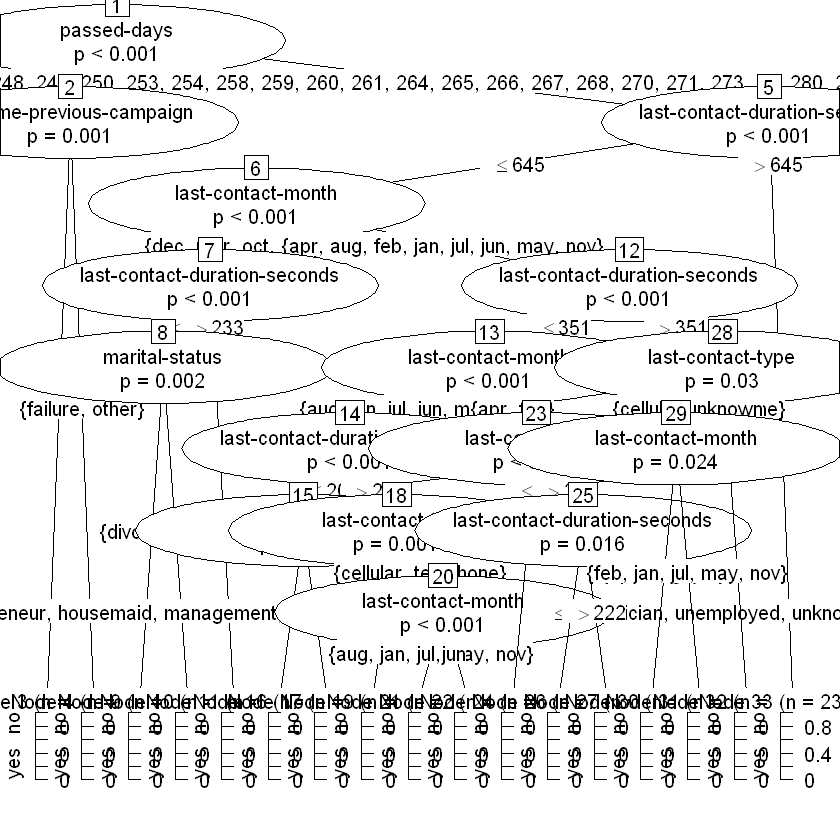

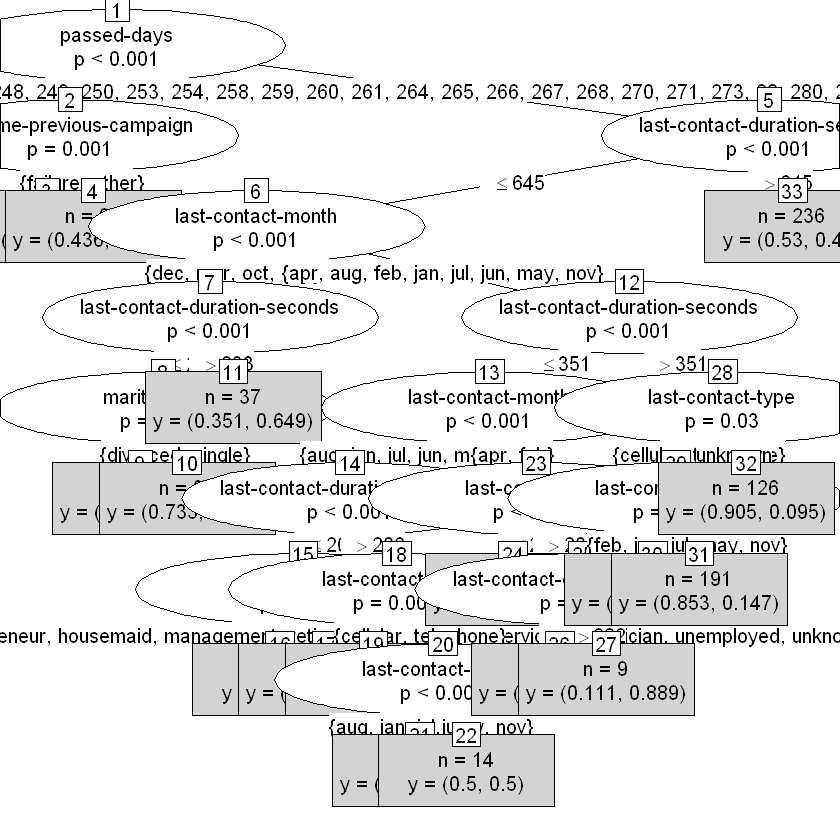

In [19]:
# visualize the tree
nodes(model, 2)
plot(model)
plot(model, type="simple")

ERROR: Error in as.double(y): cannot coerce type 'S4' to vector of type 'double'


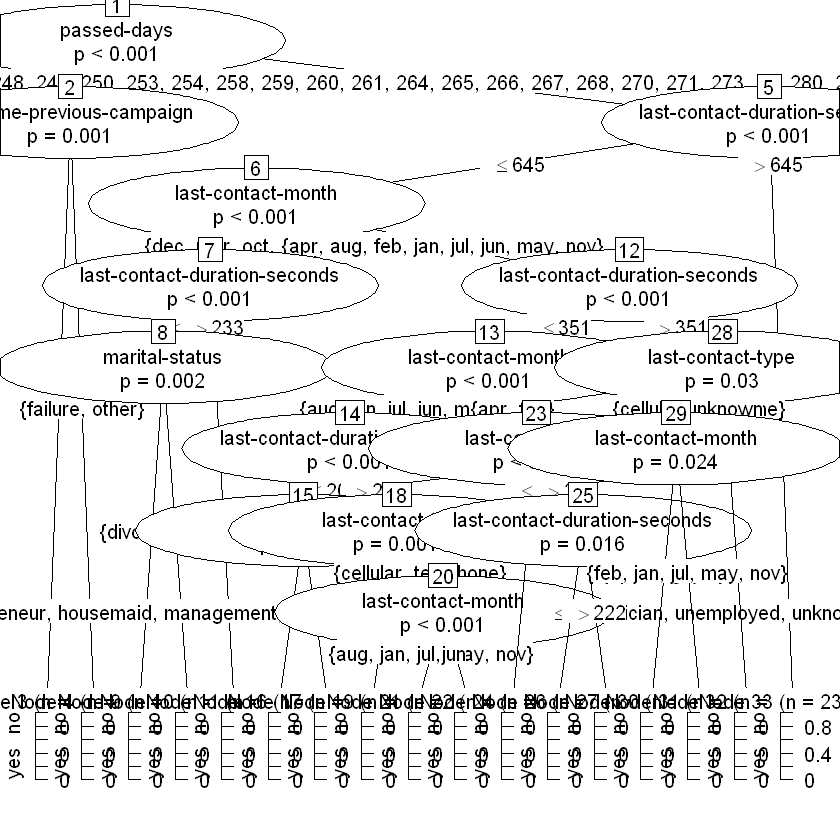

In [20]:
# Plot the model
par(xpd = TRUE)
plot(model, compress=TRUE)   # plot the tree skelleton
text(model, use.n = TRUE) 

In [21]:
# confusion matrix
table(predict(model), train$`suscribed-term-deposited`)
prop.table(table(predict(model), train$`suscribed-term-deposited`))
trainPred<-predict(model , newdata = train)

confusionMatrix(data=trainPred, reference = train$`suscribed-term-deposited`)

     
        no  yes
  no  2743  239
  yes   62  137

     
              no        yes
  no  0.86230745 0.07513361
  yes 0.01949073 0.04306822

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  2743  239
       yes   62  137
                                          
               Accuracy : 0.9054          
                 95% CI : (0.8947, 0.9153)
    No Information Rate : 0.8818          
    P-Value [Acc > NIR] : 1.262e-05       
                                          
                  Kappa : 0.4299          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9779          
            Specificity : 0.3644          
         Pos Pred Value : 0.9199          
         Neg Pred Value : 0.6884          
             Prevalence : 0.8818          
         Detection Rate : 0.8623          
   Detection Prevalence : 0.9374          
      Balanced Accuracy : 0.6711          
                                          
       'Positive' Class : no              
                        

In [22]:
# Evaluate the model on a test data
testPred <- predict(model, newdata = test)
table (testPred, test$`suscribed-term-deposited`)

confusionMatrix(data=testPred, reference = test$`suscribed-term-deposited`)

model<-rpart(`suscribed-term-deposited`~., train, method="class")

        
testPred   no  yes
     no  1148  115
     yes   47   30

Confusion Matrix and Statistics

          Reference
Prediction   no  yes
       no  1148  115
       yes   47   30
                                          
               Accuracy : 0.8791          
                 95% CI : (0.8604, 0.8961)
    No Information Rate : 0.8918          
    P-Value [Acc > NIR] : 0.9363          
                                          
                  Kappa : 0.211           
                                          
 Mcnemar's Test P-Value : 1.409e-07       
                                          
            Sensitivity : 0.9607          
            Specificity : 0.2069          
         Pos Pred Value : 0.9089          
         Neg Pred Value : 0.3896          
             Prevalence : 0.8918          
         Detection Rate : 0.8567          
   Detection Prevalence : 0.9425          
      Balanced Accuracy : 0.5838          
                                          
       'Positive' Class : no              
                        

In [23]:
# Look for an inflection point to determine the optimal number of splits
model$cptable

CP,nsplit,rel error,xerror,xstd
0.15159574,0,1.0000000,1.0000000,0.04842735
0.04255319,1,0.8484043,1.0611702,0.04968157
0.02260638,2,0.8058511,1.0079787,0.04859415
0.01728723,5,0.7313830,0.9920213,0.04825955
0.01462766,7,0.6968085,0.9680851,0.04775012
0.01329787,9,0.6675532,0.9654255,0.04769294
0.01000000,10,0.6542553,0.9760638,0.04792095


In [24]:
#an alternative way to print complexity table
printcp(model)


Classification tree:
rpart(formula = `suscribed-term-deposited` ~ ., data = train, 
    method = "class")

Variables actually used in tree construction:
[1] job                           last-contact-duration-seconds
[3] last-contact-month            marital-status               
[5] passed-days                  

Root node error: 376/3181 = 0.1182

n= 3181 

        CP nsplit rel error  xerror     xstd
1 0.151596      0   1.00000 1.00000 0.048427
2 0.042553      1   0.84840 1.06117 0.049682
3 0.022606      2   0.80585 1.00798 0.048594
4 0.017287      5   0.73138 0.99202 0.048260
5 0.014628      7   0.69681 0.96809 0.047750
6 0.013298      9   0.66755 0.96543 0.047693
7 0.010000     10   0.65426 0.97606 0.047921


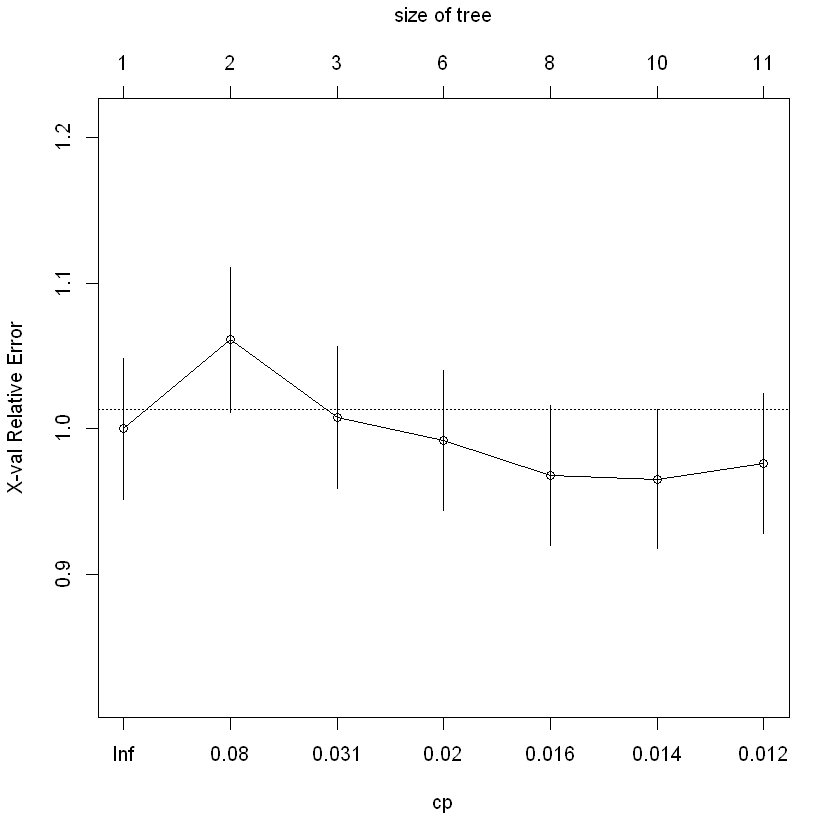

In [25]:
#plot complexity table.  
plotcp(model)

### The table shows the error reduction at each split (xerror)